<a href="https://colab.research.google.com/github/amitshakarchy/big-data-analysis/blob/main/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Amit Shakarchy

Github link: https://github.com/amitshakarchy/big-data-analysis

# Homework Assignment  6

**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [39]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"aamitshakarchy","key":"004ade6e43f08b393cf10784d7e16ab0"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets list -s 'amazon fine food reviews'

ref                                                            title                                              size  lastUpdated          downloadCount  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
snap/amazon-fine-food-reviews                                  Amazon Fine Food Reviews                          242MB  2017-05-01 18:51:31         109412  
ajaysh/amazon-fine-food-reviews                                Amazon Fine Food Reviews                          128MB  2018-05-15 10:01:32            269  
rickyjli/chinese-fine-art                                      Chinese Fine Art                                  323MB  2020-05-02 03:00:40            477  
synergystud/a-fine-windy-day-hackerearth-ml-challenge          A Fine Windy Day                                    6MB  2021-04-28 14:47:56            266  
abhinandan103/amazon-fine-food-review                     

In [40]:
!mkdir ./datasets
!mkdir ./datasets/FoodReviews

# download the dataset from Kaggle and unzip it
!kaggle datasets download snap/amazon-fine-food-reviews -p ./datasets/FoodReviews
!unzip ./datasets/FoodReviews/*.zip  -d ./datasets/FoodReviews/

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/FoodReviews’: File exists
amazon-fine-food-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/FoodReviews/amazon-fine-food-reviews.zip
replace ./datasets/FoodReviews/Reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/FoodReviews/database.sqlite? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./datasets/FoodReviews/hashes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [41]:
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn

  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
tensorflow 2.0.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which

In [42]:
!pip install turicreate
import turicreate as tc

  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.18.5 which is incompatible.
librosa 0.8.1 requires resampy>=0.2.2, but you have resampy 0.2.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/FoodReviews/Reviews.csv")
sf

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/FoodReviews/Reviews.csv

Parsing completed. Parsed 100 lines in 1.31667 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 44587.9

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/FoodReviews/Reviews.csv

Parsing completed. Parsed 260995 lines in 4.06465 secs.

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""NataliaCorres"" ...",1,1,4
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5


In [ ]:
cls_sf = sf['ProductId', 'Score', 'Summary', 'Text']
cls_sf

ProductId,Score,Summary,Text
B001E4KFG0,5,Good Quality Dog Food,I have bought several ofthe Vitality canned dog ...
B00813GRG4,1,Not as Advertised,Product arrived labeledas Jumbo Salted ...
B000LQOCH0,4,"""Delight"" says it all",This is a confection thathas been around a few ...
B000UA0QIQ,2,Cough Medicine,If you are looking forthe secret ingredient in ...
B006K2ZZ7K,5,Great taffy,Great taffy at a greatprice. There was a wide ...
B006K2ZZ7K,4,Nice Taffy,I got a wild hair fortaffy and ordered this ...
B006K2ZZ7K,5,Great! Just as good asthe expensive brands! ...,This saltwater taffy hadgreat flavors and was ...
B006K2ZZ7K,5,"Wonderful, tasty taffy",This taffy is so good.It is very soft and ...
B000E7L2R4,5,Yay Barley,Right now I'm mostly justsprouting this so my ...
B00171APVA,5,Healthy Dog Food,This is a very healthydog food. Good for their ...


In [ ]:
# score has to be 1 or 5:
cls_sf = cls_sf[cls_sf['Score'] != 3]
def score2sentiment(score):
    if score >= 4:
        return "FiveStar"
    else:
        return "OneStar"

cls_sf['sentiment'] = cls_sf['Score'].apply(lambda score: score2sentiment(score))
cls_sf

ProductId,Score,Summary,Text,sentiment
B001E4KFG0,5,Good Quality Dog Food,I have bought several ofthe Vitality canned dog ...,FiveStar
B00813GRG4,1,Not as Advertised,Product arrived labeledas Jumbo Salted ...,OneStar
B000LQOCH0,4,"""Delight"" says it all",This is a confection thathas been around a few ...,FiveStar
B000UA0QIQ,2,Cough Medicine,If you are looking forthe secret ingredient in ...,OneStar
B006K2ZZ7K,5,Great taffy,Great taffy at a greatprice. There was a wide ...,FiveStar
B006K2ZZ7K,4,Nice Taffy,I got a wild hair fortaffy and ordered this ...,FiveStar
B006K2ZZ7K,5,Great! Just as good asthe expensive brands! ...,This saltwater taffy hadgreat flavors and was ...,FiveStar
B006K2ZZ7K,5,"Wonderful, tasty taffy",This taffy is so good.It is very soft and ...,FiveStar
B000E7L2R4,5,Yay Barley,Right now I'm mostly justsprouting this so my ...,FiveStar
B00171APVA,5,Healthy Dog Food,This is a very healthydog food. Good for their ...,FiveStar


In [ ]:
cls_sf['words_1grams'] = tc.text_analytics.count_ngrams(cls_sf['Text'], n=1, method='word')
cls_sf['words_2grams'] = tc.text_analytics.count_ngrams(cls_sf['Text'], n=2, method='word')
cls_sf

ProductId,Score,Summary,Text,sentiment,words_1grams
B001E4KFG0,5,Good Quality Dog Food,I have bought several ofthe Vitality canned dog ...,FiveStar,"{'most': 1, 'this': 1,'appreciates': 1, ..."
B00813GRG4,1,Not as Advertised,Product arrived labeledas Jumbo Salted ...,OneStar,"{'to': 1, 'intended': 1,'salted': 1, 'as': 2, ..."
B000LQOCH0,4,"""Delight"" says it all",This is a confection thathas been around a few ...,FiveStar,"{'sisters': 1, 'brother':1, 'out': 1, 'selling': ..."
B000UA0QIQ,2,Cough Medicine,If you are looking forthe secret ingredient in ...,OneStar,"{'medicinal': 1,'flavor': 1, 'soda': 1, ..."
B006K2ZZ7K,5,Great taffy,Great taffy at a greatprice. There was a wide ...,FiveStar,"{'deal': 1, 'lover': 1,'this': 1, 'your': 1, ..."
B006K2ZZ7K,4,Nice Taffy,I got a wild hair fortaffy and ordered this ...,FiveStar,"{'treat': 1,'delightful': 1, 'it' ..."
B006K2ZZ7K,5,Great! Just as good asthe expensive brands! ...,This saltwater taffy hadgreat flavors and was ...,FiveStar,"{'everyone': 1, 'themed':1, 'at': 1, 'served': 1, ..."
B006K2ZZ7K,5,"Wonderful, tasty taffy",This taffy is so good.It is very soft and ...,FiveStar,"{'recommend': 1, 'would':1, 'i': 1, 'amazing': 1, ..."
B000E7L2R4,5,Yay Barley,Right now I'm mostly justsprouting this so my ...,FiveStar,"{'too': 1, 'rye': 1,'my': 1, 'just': 1, ..."
B00171APVA,5,Healthy Dog Food,This is a very healthydog food. Good for their ...,FiveStar,"{'feeding': 1, 'at': 1,'her': 1, 'required': 1, ..."


In [ ]:
train, test = cls_sf.random_split(0.8)
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 183501

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1527925

Number of coefficients      : 1527926

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.080399  | 8.176726     | 0.846301          | 0.853489            |

| 1         | 9        | 1.688385  | 14.449693    | 0.923085          | 0.879478            |

| 2         | 10       | 1.688385  | 16.695663    | 0.995493          | 0.944295            |

| 3         | 11       | 1.688385  | 18.929943    | 0.998000          | 0.947608            |

| 4         | 13       | 1.688385  | 22.542287    | 0.999243          | 0.951025            |

| 6         | 15       | 1.688385  | 27.044113    | 0.999864          | 0.953924            |

| 7         | 16       | 1.688385  | 29.331646    | 0.999924          | 0.954131            |

| 8         | 17       | 1.688385  | 31.675256    | 0.999929          | 0.954545            |

| 9         | 19       | 0.600941  | 35.407840    | 0.999929          | 0.954545            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 183501

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 1527925

Number of coefficients    : 1527926

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.082360  | 6.361217     | 0.846301          | 0.853489            |

| 1         | 11       | 4.365101  | 14.705441    | 0.992594          | 0.946987            |

| 2         | 16       | 3.808463  | 21.937583    | 0.998550          | 0.952785            |

| 3         | 17       | 3.808463  | 24.180351    | 0.999428          | 0.945434            |

| 4         | 19       | 1.409204  | 27.600659    | 0.999575          | 0.951750            |

| 6         | 22       | 1.074861  | 33.171618    | 0.999869          | 0.952268            |

| 7         | 23       | 1.074861  | 35.420085    | 0.999902          | 0.952060            |

| 8         | 29       | 3.017247  | 43.725931    | 0.999929          | 0.952060            |

| 9         | 35       | 1.479031  | 52.068078    | 0.999929          | 0.952371            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9545454545454546
PROGRESS: SVMClassifier                   : 0.9523710913232554
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [ ]:
cls.evaluate(test)

{'accuracy': 0.9528524671665907,
 'auc': 0.9694873899117246,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   FiveStar   |     OneStar     |  524  |
 |   OneStar    |     OneStar     |  5636 |
 |   FiveStar   |     FiveStar    | 40362 |
 |   OneStar    |     FiveStar    |  1752 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.8320047239444937,
 'log_loss': 0.15308071346350913,
 'precision': 0.9149350649350649,
 'recall': 0.7628586897671901,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+---------------------+--------------------+------+-------+
 | threshold |         fpr         |        tpr         |  p   |   n   |
 +-----------+---------------------+--------------------+------+-------+
 |    

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [ ]:
train, test = cls_sf[:100000].random_split(0.8) # dataset is too big to run on colab. Results can be relatively bad, Sorry for that :(

In [ ]:
from afinn import Afinn
afinn = Afinn()

train['afinn_score'] = train['Text'].apply(lambda t: afinn.score(t))
test['afinn_score'] = test['Text'].apply(lambda t: afinn.score(t))
train

ProductId,Score,Summary,Text,sentiment,words_1grams
B001E4KFG0,5,Good Quality Dog Food,I have bought several ofthe Vitality canned dog ...,FiveStar,"{'most': 1, 'this': 1,'appreciates': 1, ..."
B00813GRG4,1,Not as Advertised,Product arrived labeledas Jumbo Salted ...,OneStar,"{'to': 1, 'intended': 1,'salted': 1, 'as': 2, ..."
B000LQOCH0,4,"""Delight"" says it all",This is a confection thathas been around a few ...,FiveStar,"{'sisters': 1, 'brother':1, 'out': 1, 'selling': ..."
B000UA0QIQ,2,Cough Medicine,If you are looking forthe secret ingredient in ...,OneStar,"{'medicinal': 1,'flavor': 1, 'soda': 1, ..."
B006K2ZZ7K,5,Great taffy,Great taffy at a greatprice. There was a wide ...,FiveStar,"{'deal': 1, 'lover': 1,'this': 1, 'your': 1, ..."
B006K2ZZ7K,4,Nice Taffy,I got a wild hair fortaffy and ordered this ...,FiveStar,"{'treat': 1,'delightful': 1, 'it' ..."
B006K2ZZ7K,5,Great! Just as good asthe expensive brands! ...,This saltwater taffy hadgreat flavors and was ...,FiveStar,"{'everyone': 1, 'themed':1, 'at': 1, 'served': 1, ..."
B006K2ZZ7K,5,"Wonderful, tasty taffy",This taffy is so good.It is very soft and ...,FiveStar,"{'recommend': 1, 'would':1, 'i': 1, 'amazing': 1, ..."
B000E7L2R4,5,Yay Barley,Right now I'm mostly justsprouting this so my ...,FiveStar,"{'too': 1, 'rye': 1,'my': 1, 'just': 1, ..."
B00171APVA,5,Healthy Dog Food,This is a very healthydog food. Good for their ...,FiveStar,"{'feeding': 1, 'at': 1,'her': 1, 'required': 1, ..."


In [ ]:
cls = tc.boosted_trees_classifier.create(train,features=['afinn_score', 'words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 76039

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 923250

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.753117     | 0.871855          | 0.860605            | 0.536042          | 0.541032            |

| 2         | 5.493733     | 0.876208          | 0.863602            | 0.448333          | 0.458333            |

| 3         | 8.061060     | 0.880233          | 0.867350            | 0.393861          | 0.406739            |

| 4         | 10.704676    | 0.882429          | 0.867100            | 0.358234          | 0.374460            |

| 5         | 13.359081    | 0.883823          | 0.870847            | 0.332801          | 0.352144            |

| 10        | 26.628079    | 0.893528          | 0.876093            | 0.276234          | 0.304244            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [ ]:
affin_eval = cls.evaluate(test)
affin_eval

{'accuracy': 0.8844072552359956,
 'auc': 0.887019437078338,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   OneStar    |     FiveStar    |  1992 |
 |   FiveStar   |     OneStar     |  315  |
 |   OneStar    |     OneStar     |  1158 |
 |   FiveStar   |     FiveStar    | 16493 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.500973393900065,
 'log_loss': 0.2934916841324498,
 'precision': 0.7861507128309573,
 'recall': 0.3676190476190476,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+-------+
 | threshold | fpr | tpr |  p   |   n   |
 +-----------+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 3150 | 16808 |
 |   0.001   | 1.0 | 1.0 | 3150 | 16808 |
 |   0.002   | 1.0

In [ ]:
! pip install -U textblob
! python -m textblob.download_corpora

     |████████████████████████████████| 636 kB 5.5 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

train['blob_score'] = train['Text'].apply(lambda t: TextBlob(t).sentences[0].polarity)
test['blob_score'] = test['Text'].apply(lambda t: TextBlob(t).sentences[0].polarity)

In [ ]:
cls = tc.boosted_trees_classifier.create(train[:],features=['blob_score', 'words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 76039

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 923583

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.707361     | 0.856153          | 0.859355            | 0.551522          | 0.551054            |

| 2         | 5.396050     | 0.865451          | 0.867100            | 0.473346          | 0.472646            |

| 3         | 8.064013     | 0.864464          | 0.868349            | 0.424212          | 0.423670            |

| 4         | 10.703114    | 0.864451          | 0.867849            | 0.390919          | 0.389858            |

| 5         | 13.439203    | 0.865451          | 0.868599            | 0.367457          | 0.367917            |

| 10        | 26.445969    | 0.877721          | 0.882338            | 0.308081          | 0.311507            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [ ]:
textblob_eval = cls.evaluate(test)
textblob_eval

{'accuracy': 0.8732337909610182,
 'auc': 0.8636379501824526,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   FiveStar   |     OneStar     |   83  |
 |   OneStar    |     FiveStar    |  2447 |
 |   OneStar    |     OneStar     |  703  |
 |   FiveStar   |     FiveStar    | 16725 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.35721544715447157,
 'log_loss': 0.3204299175682551,
 'precision': 0.8944020356234097,
 'recall': 0.22317460317460316,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+-----+-----+------+-------+
 | threshold | fpr | tpr |  p   |   n   |
 +-----------+-----+-----+------+-------+
 |    0.0    | 1.0 | 1.0 | 3150 | 16808 |
 |   0.001   | 1.0 | 1.0 | 3150 | 16808 |
 |   0.002   |

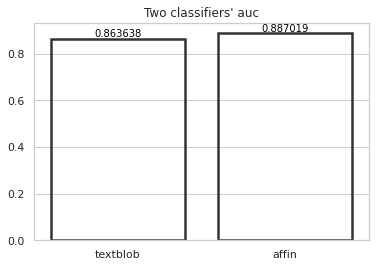

In [ ]:
# Compare the two classifiers results and visualize it (however you want) 
import pandas as pd
auc_scores = pd.DataFrame()
auc_scores['textblob'] = [textblob_eval['auc']]
auc_scores['affin'] = [affin_eval['auc']]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
ax = sns.barplot(data=auc_scores,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Two classifiers' auc")
for p in ax.patches:
             ax.annotate("%f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')


**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [43]:
!mkdir ./datasets/100k-courseras-course-reviews-dataset

# download the dataset from Kaggle and unzip it
!kaggle datasets download septa97/100k-courseras-course-reviews-dataset -f reviews.csv  -p ./datasets/100k-courseras-course-reviews-dataset
!unzip ./datasets/100k-courseras-course-reviews-dataset/*.zip  -d ./datasets/100k-courseras-course-reviews-dataset/

mkdir: cannot create directory ‘./datasets/100k-courseras-course-reviews-dataset’: File exists
reviews.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/100k-courseras-course-reviews-dataset/reviews.csv.zip
replace ./datasets/100k-courseras-course-reviews-dataset/reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./datasets/100k-courseras-course-reviews-dataset/reviews.csv  


In [3]:
import turicreate as tc
sf = tc.SFrame.read_csv("./datasets/100k-courseras-course-reviews-dataset/reviews.csv")
sf

Finished parsing file /content/datasets/100k-courseras-course-reviews-dataset/reviews.csv

Parsing completed. Parsed 100 lines in 0.513677 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/100k-courseras-course-reviews-dataset/reviews.csv

Parsing completed. Parsed 107018 lines in 0.368464 secs.

Id,Review,Label
0,good and interesting,5
1,This class is veryhelpful to me. Curren ...,5
2,like!Prof and TAs arehelpful and the ...,5
3,Easy to follow andincludes a lot basic and ...,5
4,Really nice teacher!Icould got the point ...,4
5,"Great course - Irecommend it for all, ...",5
6,One of the most usefulcourse on IT Management! ...,5
7,I was disappointedbecause the name is ...,3
8,Super content. I'lldefinitely re-do the ...,5
9,One of the excellentcourses at Coursera for ...,5


In [4]:
sf = sf[sf['Label'] != 3]
def label2sentiment(label):
    if label >= 4:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['Label'].apply(lambda label: label2sentiment(label))
sf

Id,Review,Label,sentiment
0,good and interesting,5,Positive
1,This class is veryhelpful to me. Curren ...,5,Positive
2,like!Prof and TAs arehelpful and the ...,5,Positive
3,Easy to follow andincludes a lot basic and ...,5,Positive
4,Really nice teacher!Icould got the point ...,4,Positive
5,"Great course - Irecommend it for all, ...",5,Positive
6,One of the most usefulcourse on IT Management! ...,5,Positive
8,Super content. I'lldefinitely re-do the ...,5,Positive
9,One of the excellentcourses at Coursera for ...,5,Positive
10,Is there any reason whyyou should not apply the ...,5,Positive


In [ ]:
import spacy
#!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install
nlp = spacy.load('en_core_web_lg')

In [5]:
from tqdm import tqdm
l = []
for i in tqdm(range(len(sf))):
    text = sf[i]["Review"]
    l.append(nlp(text).vector)
sf['vector'] = l 
sf

100%|██████████| 101947/101947 [24:21<00:00, 69.74it/s]


Id,Review,Label,sentiment,vector
0,good and interesting,5,Positive,[-2.32115671e-012.32182667e-01 ...
1,This class is veryhelpful to me. Curren ...,5,Positive,[-5.86119713e-042.56630570e-01 ...
2,like!Prof and TAs arehelpful and the ...,5,Positive,[-9.35494304e-028.32590014e-02 ...
3,Easy to follow andincludes a lot basic and ...,5,Positive,[-6.36644140e-028.63443241e-02 ...
4,Really nice teacher!Icould got the point ...,4,Positive,[-1.85936373e-021.59248367e-01 ...
5,"Great course - Irecommend it for all, ...",5,Positive,[-1.13400117e-012.60630727e-01 ...
6,One of the most usefulcourse on IT Management! ...,5,Positive,[-1.04022004e-011.77965701e-01 ...
8,Super content. I'lldefinitely re-do the ...,5,Positive,[-4.58760001e-021.45201743e-01 ...
9,One of the excellentcourses at Coursera for ...,5,Positive,[-8.29980001e-021.16817139e-01 ...
10,Is there any reason whyyou should not apply the ...,5,Positive,[-9.43170190e-021.65416613e-01 ...


In [6]:
# run a classifier on the vectors (with no improvements)
train, test  = sf[:100000].random_split(0.8) # use a portion of the data so colab won't get stuck
cls1 = tc.random_forest_classifier.create(train,features=['vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 75843

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.480315     | 0.955316          | 0.956413            | 0.208922          | 0.209315            |

| 2         | 2.989276     | 0.956159          | 0.957665            | 0.206552          | 0.208178            |

| 3         | 4.559173     | 0.955025          | 0.957415            | 0.206651          | 0.208154            |

| 4         | 6.051479     | 0.954604          | 0.956914            | 0.205904          | 0.206894            |

| 5         | 7.508579     | 0.954683          | 0.957164            | 0.205442          | 0.206401            |

| 10        | 14.773646    | 0.955065          | 0.957665            | 0.204801          | 0.205370            |

| 15        | 22.004238    | 0.955091          | 0.957916            | 0.204582          | 0.205372            |

| 20        | 29.236710    | 0.954960          | 0.958166            | 0.204530          | 0.205272            |

| 25        | 36.566541    | 0.954828          | 0.958166            | 0.204448          | 0.205231            |

| 30        | 43.859736    | 0.954670          | 0.958166            | 0.204437          | 0.205332            |

| 35        | 51.197075    | 0.954722          | 0.958166            | 0.204463          | 0.205353            |

| 40        | 58.404424    | 0.954749          | 0.958166            | 0.204461          | 0.205370            |

| 45        | 65.683389    | 0.954775          | 0.958166            | 0.204450          | 0.205361            |

| 50        | 72.996151    | 0.954841          | 0.957916            | 0.204374          | 0.205351            |

| 55        | 80.233743    | 0.954828          | 0.957916            | 0.204351          | 0.205427            |

| 60        | 87.614490    | 0.954801          | 0.957916            | 0.204352          | 0.205442            |

| 65        | 94.975869    | 0.954801          | 0.958166            | 0.204377          | 0.205408            |

| 70        | 102.352992   | 0.954880          | 0.957916            | 0.204335          | 0.205381            |

| 75        | 109.539880   | 0.954907          | 0.957916            | 0.204339          | 0.205362            |

| 80        | 116.843837   | 0.954828          | 0.957916            | 0.204315          | 0.205327            |

| 85        | 124.063652   | 0.954907          | 0.957916            | 0.204307          | 0.205224            |

| 90        | 131.516129   | 0.954854          | 0.957916            | 0.204318          | 0.205286            |

| 95        | 138.784866   | 0.954933          | 0.957916            | 0.204325          | 0.205343            |

| 100       | 146.336728   | 0.954880          | 0.957916            | 0.204329          | 0.205376            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [8]:
cls1_eval = cls1.evaluate(test)

In [14]:
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['Review'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['Review'], n=2, method='word')

In [15]:
# improvements- 1grams and 2grams as features
train, test  = sf[:100000].random_split(0.8) # use a portion of the data so colab won't get stuck
cls2 = tc.random_forest_classifier.create(train,features=['vector','words_1grams', 'words_2grams'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 76017

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 382875

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 3.523792     | 0.958943          | 0.956011            | 0.204041          | 0.203379            |

| 2         | 6.106787     | 0.958325          | 0.960760            | 0.202331          | 0.201510            |

| 3         | 8.784696     | 0.959509          | 0.960760            | 0.201322          | 0.201161            |

| 4         | 11.564185    | 0.959141          | 0.961010            | 0.200550          | 0.200480            |

| 5         | 14.128670    | 0.959654          | 0.962009            | 0.200924          | 0.200112            |

| 10        | 27.414742    | 0.959391          | 0.962759            | 0.199811          | 0.198616            |

| 15        | 40.895605    | 0.959549          | 0.962009            | 0.199342          | 0.197616            |

| 20        | 54.088408    | 0.959391          | 0.962009            | 0.199236          | 0.197695            |

| 25        | 67.364661    | 0.959391          | 0.961760            | 0.199041          | 0.197682            |

| 30        | 80.755825    | 0.959180          | 0.961010            | 0.199061          | 0.197785            |

| 35        | 94.258872    | 0.959430          | 0.961260            | 0.198915          | 0.197608            |

| 40        | 107.196881   | 0.959364          | 0.961510            | 0.198924          | 0.197642            |

| 45        | 120.130431   | 0.959417          | 0.962009            | 0.198957          | 0.197642            |

| 50        | 133.214395   | 0.959706          | 0.962259            | 0.198868          | 0.197725            |

| 55        | 146.339707   | 0.959864          | 0.962259            | 0.198821          | 0.197799            |

| 60        | 159.597324   | 0.959746          | 0.961760            | 0.198806          | 0.197822            |

| 65        | 172.541151   | 0.959483          | 0.961510            | 0.198849          | 0.197736            |

| 70        | 185.283033   | 0.959259          | 0.961510            | 0.198916          | 0.197766            |

| 75        | 198.005172   | 0.959088          | 0.962009            | 0.198914          | 0.197786            |

| 80        | 210.886696   | 0.959022          | 0.961760            | 0.198939          | 0.197773            |

| 85        | 224.216839   | 0.958957          | 0.961260            | 0.198906          | 0.197803            |

| 90        | 237.391130   | 0.958970          | 0.961510            | 0.198938          | 0.197789            |

| 95        | 250.579107   | 0.958943          | 0.961760            | 0.198924          | 0.197798            |

| 100       | 263.483350   | 0.958930          | 0.961510            | 0.198949          | 0.197803            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [16]:
cls2_eval = cls2.evaluate(test)

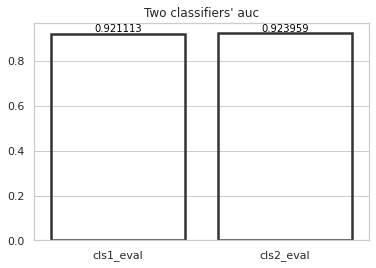

In [17]:
import pandas as pd
auc_scores = pd.DataFrame()
auc_scores['cls1_eval'] = [cls1_eval['auc']]
auc_scores['cls2_eval'] = [cls2_eval['auc']]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
ax = sns.barplot(data=auc_scores,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Two classifiers' auc")
for p in ax.patches:
             ax.annotate("%f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')